# Kills vs Outcomes

In this notebook, we explore how the number of kills earned by each team affects match outcome. 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
##### Allows for scrolling through data
#pd.set_option("display.max_rows", None)

The "kills" dataframe contains data on the kills each player earned on each player of the oppposing team. The data contains information on which map the match was played and the types of kills that were achieved. We aggregate this info into the "all_kill_all_maps" dataframe which just stores all kills over all maps for each player.

In [62]:
kills = pd.read_csv("../data/vct_2023/matches/kills.csv")
all_kills = kills.loc[kills['Kill Type'] == 'All Kills']
all_kills_all_maps = kills.loc[(kills['Kill Type'] == 'All Kills') & (kills['Map'] == 'All Maps')]
all_kills_all_maps.reset_index(drop = True, inplace = True)
all_kills_all_maps.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills


In [63]:
scores = pd.read_csv("../data/vct_2023/matches/scores.csv")
scores.head()

,Tournament,Stage,Match Type,Match Name,Team A,Team B,Team A Score,Team B Score,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Team Liquid,Natus Vincere,0,2,Natus Vincere won
1,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,DRX,LOUD,2,1,DRX won
2,Valorant Champions 2023,Group Stage,Opening (B),FUT Esports vs T1,FUT Esports,T1,2,0,FUT Esports won
3,Valorant Champions 2023,Group Stage,Opening (B),Evil Geniuses vs FunPlus Phoenix,Evil Geniuses,FunPlus Phoenix,2,0,Evil Geniuses won
4,Valorant Champions 2023,Group Stage,Winner's (D),Natus Vincere vs DRX,Natus Vincere,DRX,1,2,DRX won


Here, we merge the kills dataframe with the scores (match outcome) dataframe.

In [64]:
left = all_kills_all_maps
right = scores[["Tournament", "Stage", "Match Type", "Match Name", "Match Result"]]
keys = ['Tournament', 'Stage', 'Match Type', 'Match Name']
kills_vs_outcome = left.merge(right, left_on=keys, right_on=keys)
kills_vs_outcome['KDR'] = kills_vs_outcome['Player Kills']/kills_vs_outcome['Enemy Kills']
kills_vs_outcome.head() 

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type,Match Result,KDR
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills,Natus Vincere won,0.750000
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills,Natus Vincere won,0.600000
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills,Natus Vincere won,1.142857
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills,Natus Vincere won,1.400000
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills,Natus Vincere won,2.000000


In [65]:
def removeWon(s):
    return s[:-4]
kills_vs_outcome['Won'] = (kills_vs_outcome['Player Team'] == kills_vs_outcome['Match Result'].apply(removeWon)).apply(lambda x: 'Won' if x else 'Lost')

In [66]:
kills_vs_outcome.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type,Match Result,KDR,Won
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,ANGE1,9.0,12.0,-3.0,All Kills,Natus Vincere won,0.750000,Lost
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,6.0,10.0,-4.0,All Kills,Natus Vincere won,0.600000,Lost
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Zyppan,8.0,7.0,1.0,All Kills,Natus Vincere won,1.142857,Lost
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,cNed,7.0,5.0,2.0,All Kills,Natus Vincere won,1.400000,Lost
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,All Maps,Team Liquid,Jamppi,Natus Vincere,Shao,8.0,4.0,4.0,All Kills,Natus Vincere won,2.000000,Lost


## Plots

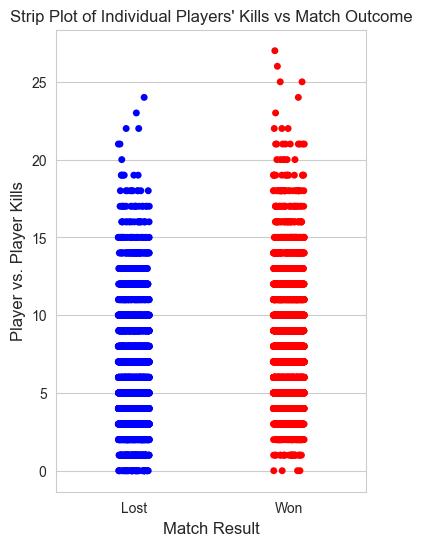

In [67]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Strip Plot of Individual Players' Kills vs Match Outcome")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

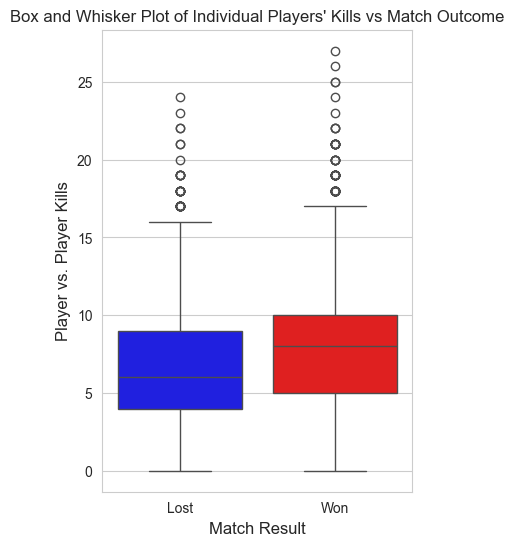

In [68]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Box and Whisker Plot of Individual Players' Kills vs Match Outcome")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills", fontsize=12)

plt.show()

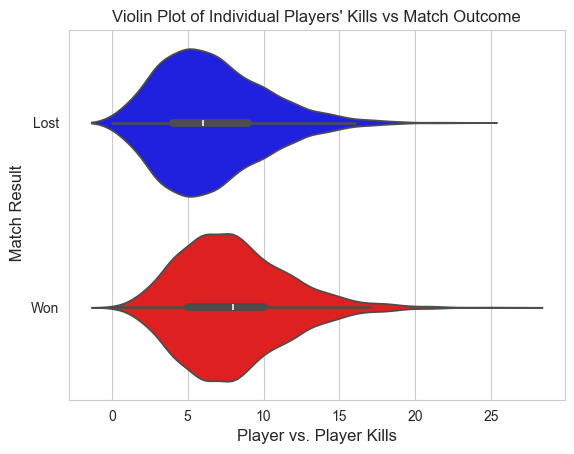

In [69]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Player Kills',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Violin Plot of Individual Players' Kills vs Match Outcome")
plt.xlabel("Player vs. Player Kills", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

Next, we look at one on one player kills difference vs match outcome.

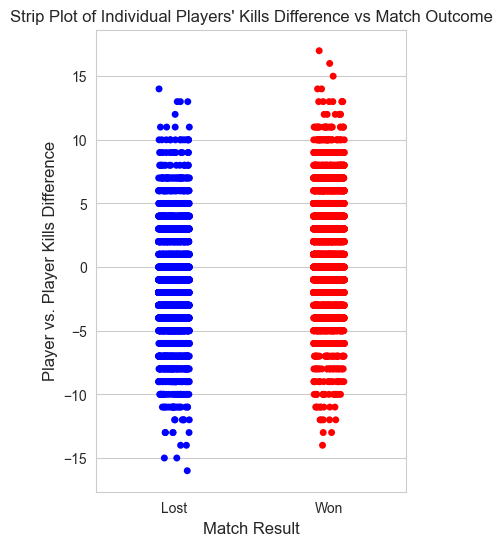

In [70]:
plt.figure(figsize=(4,6))

sns.stripplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Strip Plot of Individual Players' Kills Difference vs Match Outcome")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()


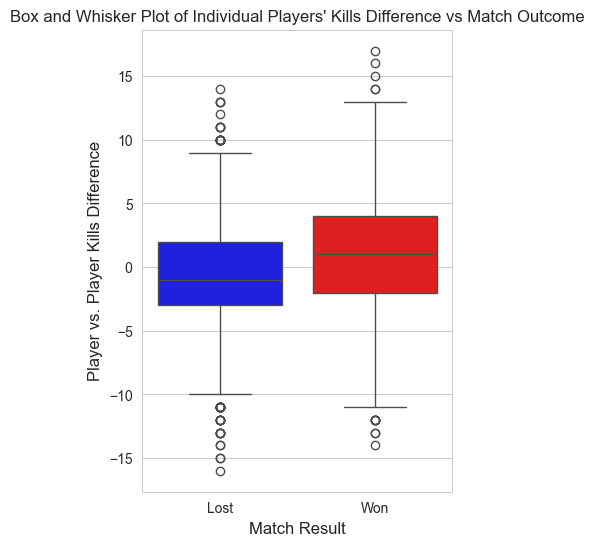

In [71]:
plt.figure(figsize=(4,6))

sns.boxplot(data=kills_vs_outcome,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Box and Whisker Plot of Individual Players' Kills Difference vs Match Outcome")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Match Result", fontsize=12)
plt.ylabel("Player vs. Player Kills Difference", fontsize=12)

plt.show()

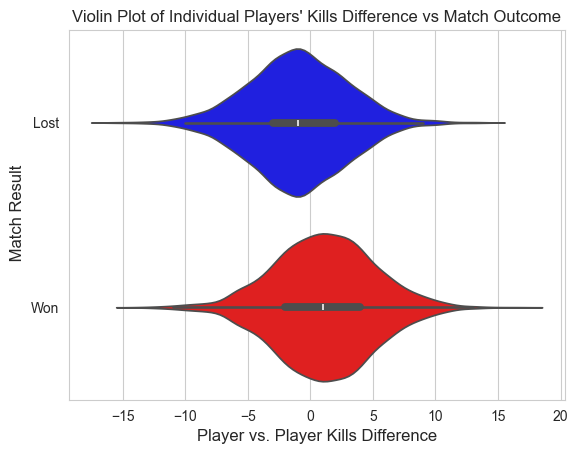

In [72]:
plt.figure()

sns.violinplot(data=kills_vs_outcome,
               y = 'Won',
               x = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Violin Plot of Individual Players' Kills Difference vs Match Outcome")
plt.xlabel("Player vs. Player Kills Difference", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

Next, we sum individual kills to get team kills for each match. We separate this data out into individual maps.

In [73]:
all_kills_by_map = all_kills.loc[all_kills["Map"] != "All Maps"]
all_kills_by_map.reset_index(drop = True, inplace = True)
all_kills_by_map.head()

,Tournament,Stage,Match Type,Match Name,Map,Player Team,Player,Enemy Team,Enemy,Player Kills,Enemy Kills,Difference,Kill Type
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,ANGE1,4.0,8.0,-4.0,All Kills
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,SUYGETSU,1.0,4.0,-3.0,All Kills
2,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Zyppan,4.0,2.0,2.0,All Kills
3,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,cNed,3.0,1.0,2.0,All Kills
4,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,Jamppi,Natus Vincere,Shao,4.0,2.0,2.0,All Kills


In [74]:
maps_scores = pd.read_csv("../data/vct_2023/matches/maps_scores.csv")

In [75]:
maps_scores["Match Result"] = np.where(maps_scores["Team A Score"] > maps_scores["Team B Score"], maps_scores["Team A"], maps_scores["Team B"])
maps_scores.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Match Result
0,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Fracture,Team Liquid,11,6,5,NaN,Natus Vincere,13,7,6,NaN,1:18:55,Natus Vincere
1,Valorant Champions 2023,Group Stage,Opening (D),Team Liquid vs Natus Vincere,Bind,Team Liquid,15,7,5,3.0,Natus Vincere,17,7,5,5.0,1:22:57,Natus Vincere
2,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Lotus,DRX,13,7,5,1.0,LOUD,15,7,5,3.0,1:17:19,LOUD
3,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Split,DRX,13,8,5,NaN,LOUD,6,2,4,NaN,47:47,DRX
4,Valorant Champions 2023,Group Stage,Opening (D),DRX vs LOUD,Ascent,DRX,13,8,5,NaN,LOUD,8,4,4,NaN,NaN,DRX


In [76]:
team_kills_by_map = kills_vs_outcome_by_map.groupby(['Player Team','Map', "Match Name", "Won"])[['Player Kills', "Enemy Kills"]].sum().reset_index()
team_kills_by_map["Difference"] = team_kills_by_map["Player Kills"] - team_kills_by_map["Enemy Kills"]
team_kills_by_map["Won w/o Kills"] = np.where((team_kills_by_map["Won"] == "Won") & (team_kills_by_map["Difference"] <= 0), True, False)
team_kills_by_map["Lost w/ Kills"] = np.where((team_kills_by_map["Won"] == "Lost") & (team_kills_by_map["Difference"] >= 0), True, False)
team_kills_by_map.head()

,Player Team,Map,Match Name,Won,Player Kills,Enemy Kills,Difference,Won w/o Kills,Lost w/ Kills
0,100 Thieves,Fracture,100 Thieves vs FNATIC,Lost,32.0,67.0,-35.0,False,False
1,100 Thieves,Icebox,100 Thieves vs EDward Gaming,Won,80.0,84.0,-4.0,True,False
2,100 Thieves,Icebox,100 Thieves vs FNATIC,Lost,76.0,91.0,-15.0,False,False
3,100 Thieves,Lotus,100 Thieves vs EDward Gaming,Lost,71.0,81.0,-10.0,False,False
4,100 Thieves,Pearl,100 Thieves vs EDward Gaming,Won,102.0,87.0,15.0,False,False


<Figure size 640x480 with 0 Axes>

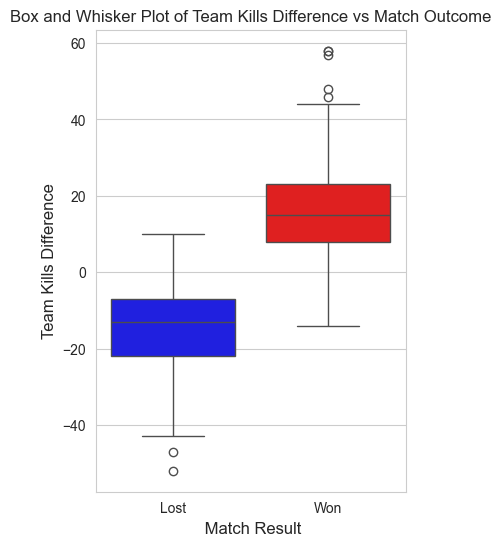

In [77]:
plt.figure()
plt.figure(figsize=(4,6))

sns.boxplot(data=team_kills_by_map,
               x = 'Won',
               y = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Box and Whisker Plot of Team Kills Difference vs Match Outcome")
plt.ylabel("Team Kills Difference", fontsize=12)
plt.xlabel(" Match Result", fontsize=12)

plt.show()

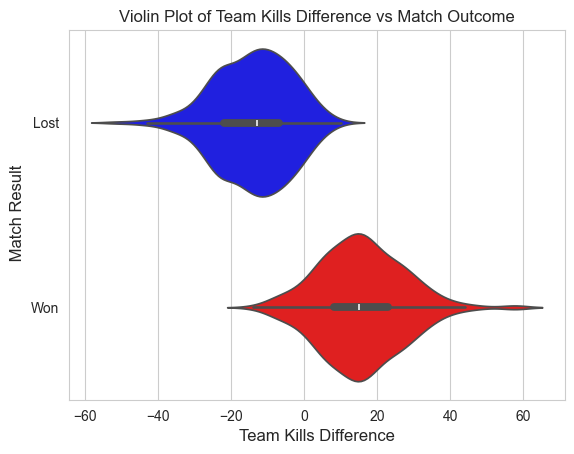

In [78]:
plt.figure()

sns.violinplot(data=team_kills_by_map,
               y = 'Won',
               x = 'Difference',
            hue='Won',
            palette=['blue', 'red'],
            legend=False)

plt.title("Violin Plot of Team Kills Difference vs Match Outcome")
plt.xlabel("Team Kills Difference", fontsize=12)
plt.ylabel(" Match Result", fontsize=12)

plt.show()

## Logistic Regression to Predict Match Outcome using Team Kills Difference

Below we use logistic regression to predict match outcome using the difference in kills (after the match is over) as a feature.

In [79]:
X = team_kills_by_map[["Difference"]]
y = team_kills_by_map["Won"] == "Won"
log_team_kills_diff = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [80]:
log_team_kills_diff.fit(X_train, y_train)
pred = log_team_kills_diff.predict(X)
acc = accuracy_score(y, pred)
print(acc)

0.9203778677462888


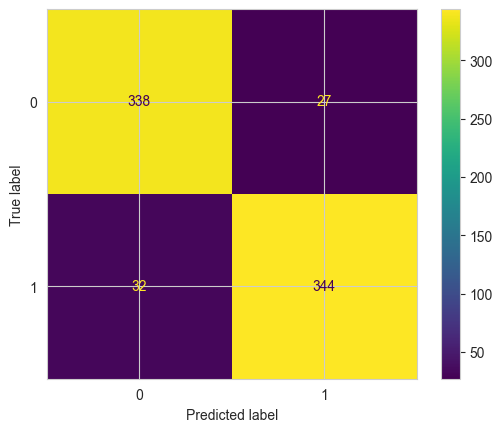

In [81]:
cm_log = confusion_matrix(y,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log)
disp.plot()
plt.show()

We compare the above result to a basline model which predicts the winner to be the team with a positive kills difference (and picking a team randomly when both teams earned the same number of kills).

In [82]:
import random
z = X["Difference"]>0
for i in range(len(y)):
    if X["Difference"][i] == 0:
        outcome = round(random.uniform(0,1))
        if outcome == 0:
            z[i] = False
        else:
            z[i] = True
w = (z == y)
print(sum(w)/len(y))

0.9203778677462888


We see that the baseline model does comparable (and somtimes better) than the logistic regression model, suggesting that logistic regression is likely predicting the winner base on the sign of the kills difference.